In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis
import scipy

## 1. Entropy maximization

The file X q1.txt contains a data set X, which is generated by a process
where A is a linear transformation that mixes different independent components of S to produce X.

The goal of ICA is to recover the independent sources S just by observing X, without knowing A
beforehand.


(a) One common preprocessing step for ICA is whitening, which transforms the data to unit covariance. Generate a “white” version $\bar {X}$ of the data X by
$\bar {X} = B D^{-\frac{1}{2}} B^{T} X$

Loading data"X_q1"

In [3]:
X = np.loadtxt("X_q1.txt")
X_T = X.T

print(np.shape(X_T))

(2, 20000)


Covarianve matrix of X

In [4]:
X_cov = np.cov(X_T)
# print("The covariance matrix of X transpose is:",X_cov)

eigenvalues and eigenvectors of X_Covariance

In [5]:
eigenvalues_XT,eigenvectors_XT = np.linalg.eig(X_cov)

# print("The eigenvalues of the Covariance matrix is:",eigenvalues_XT)
# print("The eigenvectors of the Covariance matrix is:",eigenvectors_XT)

whiten using $\bar {X} = B D^{-\frac{1}{2}} B^{T} X$ 

In [6]:
whiten_XT = eigenvectors_XT@(np.diag(eigenvalues_XT**(-0.5)))@eigenvectors_XT.T@X_T

In [7]:
print(np.shape(whiten_XT))

(2, 20000)


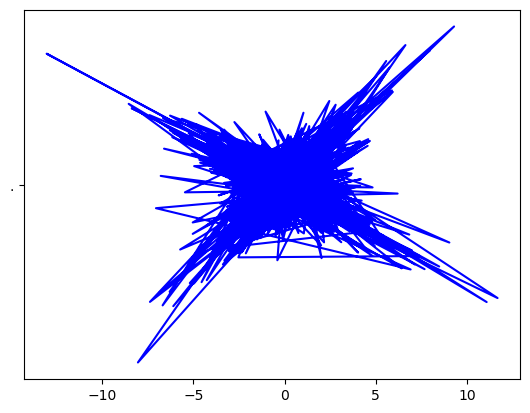

In [8]:
plt.figure()
plt.plot(X_T[0,:],X_T[1,:],'g.')
plt.plot(whiten_XT[0,:],whiten_XT[1,:],'b',".")

In [9]:
# rotation_matrix = 

b) Using the rotation matrix $R(θ)$
for $θ$ from $0◦$ to $360◦$ with a step size of $0.5◦$. Verify the rotation results by plotting some rotated examples.

In [10]:
YY = []
degrees = np.arange(0,360,0.5)
rad = np.deg2rad(degrees)

for ii in range(0,720):
    a_11 = np.cos(rad[ii])
    a_12 = -np.sin(rad[ii])
    a_21 = np.sin(rad[ii])
    a_22 = np.cos(rad[ii])
    rotation_matrix=np.array(([a_11,a_12],[a_21,a_22]))
    Y = rotation_matrix @ whiten_XT
    YY.append(Y)
   
print(np.shape(YY))

(720, 2, 20000)


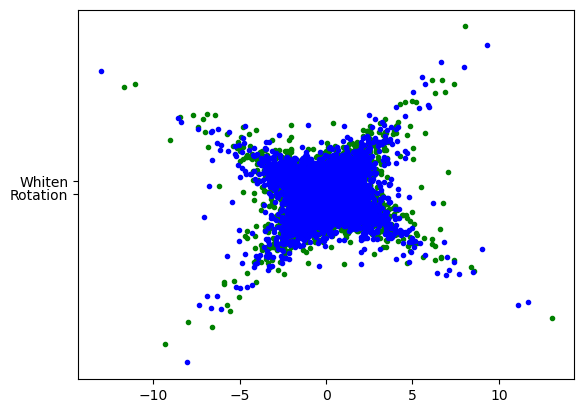

In [11]:
YY_chosen=YY[360]


plt.figure()
plt.plot(YY_chosen[0,:],YY_chosen[1,:],'g.',"Rotation")
plt.plot(whiten_XT[0,:],whiten_XT[1,:],'b.','Whiten')
plt.show()

(c) Compute the sum of marginal entropies H(Y1) + H(Y2) for all the θ above

In [12]:
Y1 = YY[1][1,:]
h_1,binx_1=np.histogram(Y1,100)
# print(binx_1)
# print(h_1)

# plt.figure()
# h_1=plt.hist(Y1,50)

In [13]:
# h_1[0]

In [14]:
p=h_1/np.sum(h_1)
indices = (p>0)
entropy= -np.sum(p[indices]*np.log(p[indices]))

print(entropy)

2.732909224256385


In [15]:
en=0

for i in range(len(h_1)):
    en += p[i]*p_ln[i]
    
print(en)

NameError: name 'p_ln' is not defined

In [ ]:
Y2 = YY[1][0,:]
h_2,binx_2=np.histogram(Y2)
print(binx_2)
print(h_2)



In [16]:
pp2 = []
sum_of_h2 = np.sum(h_2)

for i in range(len(h_2)):
    p = h_2[i]/sum_of_h2
    pp2.append(p)
    
pp_ln2 = np.log(pp2)


NameError: name 'h_2' is not defined

In [17]:
en2=0

for i in range(len(h_2)):
    en2 += pp2[i]*pp_ln2[i]
    
print(en2)

NameError: name 'h_2' is not defined

In [18]:
entropy_Y1Y2 = en + en2 

print(entropy_Y1Y2)

0


In [19]:
entropy_all_angle = np.zeros(720)

for ii in range(0,720):
    Y1 = YY[ii][1,:]
    h_1,binx_1=np.histogram(Y1,100)
    p_1=h_1/np.sum(h_1)
    indices_1 = (p_1>0)
    entropy_1 = -np.sum(p_1[indices_1]*np.log(p_1[indices_1]))
    
    Y2 = YY[ii][0,:]
    h_2,binx_2=np.histogram(Y2,100)
    p_2=h_2/np.sum(h_2)
    indices_2 = (p_2>0)
    entropy_2 = -np.sum(p_2[indices_2]*np.log(p_2[indices_2]))
    
    entropy_all_angle[ii] =  entropy_1 + entropy_2
    
# print(entropy_all_angle)

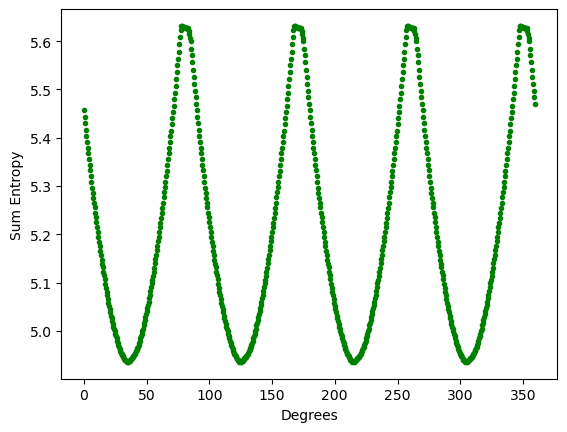

In [20]:
plt.figure()
plt.plot(degrees,entropy_all_angle,'g.')
plt.xlabel('Degrees')
plt.ylabel('Sum Entropy')
plt.show()

Kurtosis is a measure for non-Gaussianity. It has negative values for sub-Gaussian (”flatter”)
distributions, positive values for super-Gaussian (”spikier”) distributions and a value of 0 for a
Gaussian distribution. Use scipy.stats.kurtosis to compute the kurtosis Ki of Yi for every θ
and plot the the sum of the kurtosis values K1 + K2 against θ. Where is the peak and why is it
there?

In [21]:
kurtosis_all_angle = np.zeros(720)

for ii in range(0,720):
    Y1 = YY[ii][1,:]
    kurtosis_1 = kurtosis(Y1)
    
    Y2 = YY[ii][0,:]
    kurtosis_2 = kurtosis(Y2)
    
    kurtosis_all_angle[ii] =  kurtosis_1 + kurtosis_2
    
# print(kurtosis_all_angle)

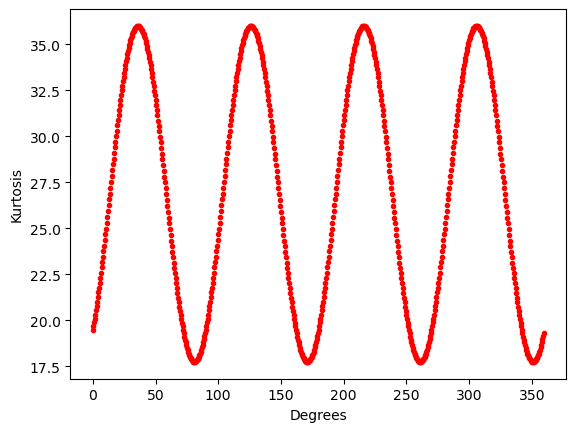

In [22]:
plt.figure()
plt.plot(degrees,kurtosis_all_angle,'r.')
plt.xlabel('Degrees')
plt.ylabel('Kurtosis')
plt.show()

The peak of the kurtosis should be the lowest point of entropy

 Obtain R0 = R(θ0) from your plot in (c) that minimizes the sum of marginal entropies. In this
case, R0
˜X should be an estimate of the independent source S. Let S = R0
˜X, and estimate the
mixing matrix ˜A as the inverse of R0BD−1/2BT. Plot the column vectors of ˜A overlaid on the
data X to verify the result.

In [23]:
min_entropy = np.min(entropy_all_angle)

print(min_entropy)

min_entropy_loc = np.where(min_entropy)\

print(min_entropy_loc)

a_11 = np.cos(rad[0])
a_12 = -np.sin(rad[0])
a_21 = np.sin(rad[0])
a_22 = np.cos(rad[0])
rotation_matrix_0=np.array(([a_11,a_12],[a_21,a_22]))

print(np.shape(rotation_matrix_0))

S = rotation_matrix_0 @ whiten_XT

print(S[0,5])

# mix_A = rotation_matrix_0 @ 

4.935469229007721
(array([0], dtype=int64),)
(2, 2)
-0.04531425174911988


In [24]:
mix_A = np.linalg.inv(rotation_matrix_0 @ eigenvectors_XT @ np.diag(eigenvalues_XT**(-0.5)) @ eigenvectors_XT.T)


print(np.shape(mix_A))

print(mix_A)

(2, 2)
[[0.00965895 0.00130748]
 [0.00130748 0.00181404]]


## 2. Blind Source Separation

In [32]:
from sklearn.decomposition import FastICA

In [33]:
sound = np.loadtxt("X_q2.txt")
sound_T = sound

# print(np.shape(sound))

In [37]:
x1 = sound[:,0]
scipy.io.wavfile.write('X1.wav', 44100, x1.astype(np.int16))

x2 = sound[:,1]
scipy.io.wavfile.write('X2.wav', 44100, x2.astype(np.int16))

x3 = sound[:,2]
scipy.io.wavfile.write('X3.wav', 44100, x3.astype(np.int16))

print(np.shape(sound_T))


(441000, 3)


In [38]:

ica = FastICA(n_components=3)
S_estimated = ica.fit_transform(sound_T)



In [39]:
for i, s in enumerate(S_estimated.T):
    scaled_data = (s / np.max(np.abs(s)) * 10000).astype(np.int16)
    scipy.io.wavfile.write(f'Source_{i+1}.wav', 44100, scaled_data)